## Copy and convert images to web application

In [74]:
from glob import glob
import os
import shutil
from PIL import Image
import numpy as np

base_dir = 'C:/Users/ZhangX1/Documents/MATLAB/CNNTrainingCrop64/LabelDataTotal'
img_dir = 'C:/Users/ZhangX1/Documents/MATLAB/CNNTrainingCrop64/TrainingDataTotal'
out_dir = 'C:/Users/ZhangX1/Documents/BeatControl/static/img/ImgToQC/'
size = (512, 512)

label_glob = glob(os.path.join(base_dir, '*'))
fname_glob = [f.split('\\')[-1] for f in label_glob]

for fname in fname_glob:
    img_file = os.path.join(img_dir, fname)
    im = Image.open(img_file)
    fnum = fname.split('.')[0]
    dst = os.path.join(out_dir, 'T1_' + fnum + '.png')
    im.save(dst)
    
for fname in fname_glob:
    label_file = os.path.join(base_dir, fname)
    label = Image.open(label_file)
    unique_vals = np.unique(label)

    label = np.array(label)
    
    if unique_vals[0] == 1:
        label[label == unique_vals[0]] = 0
        if len(unique_vals) == 2:
            label[label == unique_vals[1]] = 1*255
        else:
            ValueError('Error')
            
    label = Image.fromarray(label).convert("RGBA")
    label = label.resize(size, Image.NEAREST)
    pixdata = label.load()
    width, height = label.size
    for y in range(height):
        for x in range(width):
            if pixdata[x, y] == (0, 0, 0, 255):
                pixdata[x, y] = (0, 0, 0, 0)
                
    
    fnum = fname.split('.')[0]
    dst = os.path.join(out_dir, 'Label_' + fnum + '.png')
    label.save(dst)

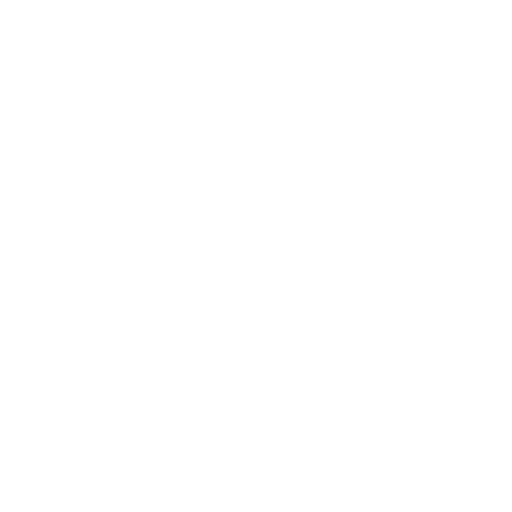

In [76]:
label

In [75]:
np.unique(label)

array([  0, 255], dtype=uint8)